In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skqlearn.clustering import KMeans
from skqlearn.jobhandler import JobHandler
from sklearn.datasets import make_blobs
from qiskit.providers.aer import AerSimulator

plt.rcParams["figure.figsize"] = (8,8)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [22]:
def plot_cluster(axis, x, labels, centers):
    # Plot each of the clusters
    legend_list = []
    for y in np.unique(labels):
        members = labels == y
        axis.scatter(x[members, 0], x[members, 1])
        axis.scatter(centers[y, 0], centers[y, 1], s=[100], marker='X')
        legend_list.append(f'Data for cluster {y}')
        legend_list.append(f'Center for cluster {y}')
        
    axis.legend(legend_list)

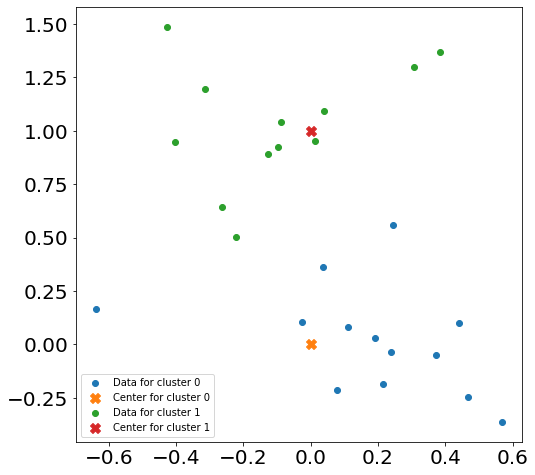

In [23]:
# Generate sample data
np.random.seed(0)
centers = np.array([[0,0], [0,1]])
n_clusters = centers.shape[0]
x, labels = make_blobs(n_samples=25, centers=centers, cluster_std=0.25)

plot_cluster(plt, x, labels, centers)

Number of iterations needed: 1


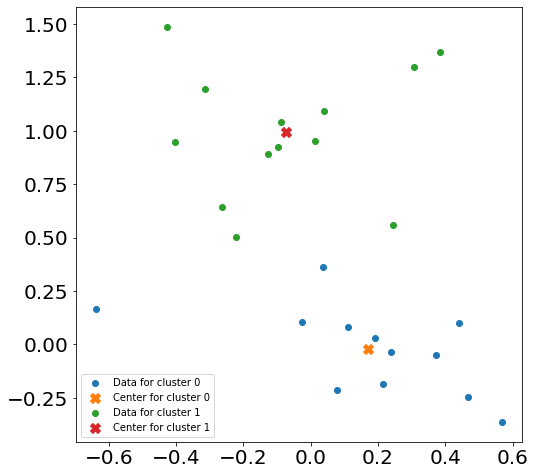

In [24]:
# KMeans - Classic computation
k_means_classic = KMeans(n_clusters=len(centers), max_iterations=1000, random_state=0, distance_calculation_method='classic')
k_means_classic.fit(x)
print(f'Number of iterations needed: {k_means_classic.n_iter}')

plot_cluster(plt, x, k_means_classic.labels, k_means_classic.cluster_centers)

Number of iterations needed: 3


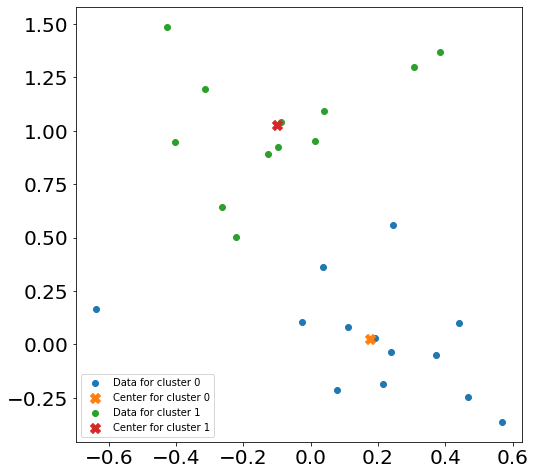

In [26]:
# KMeans - Quantum computation (simulated)
JobHandler().configure(backend=AerSimulator(), shots=50000)
k_means_quantum = KMeans(n_clusters=len(centers), max_iterations=1000, random_state=0, distance_calculation_method='quantum')
k_means_quantum.fit(x)
print(f'Number of iterations needed: {k_means_quantum.n_iter}')

plot_cluster(plt, x, k_means_quantum.labels, k_means_quantum.cluster_centers)